In [1]:
url = "http://www.presidency.ucsb.edu/sou.php"

In [2]:
from bs4 import BeautifulSoup
import urllib2
import json
url = "http://www.presidency.ucsb.edu/sou.php"
handle=urllib2.urlopen(url);
html_text=handle.read();
soup=BeautifulSoup(html_text, "html.parser");
soup
anchors=soup.find_all("td", class_="ver12");

In [3]:
messages = {}
for anch in soup.findAll('a'):
    if anch.has_attr('href') and '.edu/ws/index.php' in anch["href"] and anch.text.isdigit(): 
        if int(anch.text) in range(1935,2018):
            print int(anch.text)
            messages[int(anch.text)]=anch["href"]

print ""
print "NB: Nixon made some special messages. Roosevelt made two versions"
messages

2017
2013
2014
2015
2016
2009
2010
2011
2012
2005
2006
2007
2008
2001
2002
2003
2004
1997
1998
1999
2000
1993
1994
1995
1996
1989
1990
1991
1992
1985
1986
1987
1988
1981
1982
1983
1984
1978
1979
1980
1978
1979
1980
1981
1975
1976
1977
1974
1974
1970
1971
1972
1972
1965
1966
1967
1968
1969
1964
1961
1962
1963
1957
1958
1959
1960
1961
1953
1954
1955
1956
1949
1950
1951
1952
1953
1947
1948
1946
1945
1945
1941
1942
1943
1944
1937
1938
1939
1940
1935
1936

NB: Nixon made some special messages. Roosevelt made two versions


{1935: u'http://www.presidency.ucsb.edu/ws/index.php?pid=14890',
 1936: u'http://www.presidency.ucsb.edu/ws/index.php?pid=15095',
 1937: u'http://www.presidency.ucsb.edu/ws/index.php?pid=15336',
 1938: u'http://www.presidency.ucsb.edu/ws/index.php?pid=15517',
 1939: u'http://www.presidency.ucsb.edu/ws/index.php?pid=15684',
 1940: u'http://www.presidency.ucsb.edu/ws/index.php?pid=15856',
 1941: u'http://www.presidency.ucsb.edu/ws/index.php?pid=16092',
 1942: u'http://www.presidency.ucsb.edu/ws/index.php?pid=16253',
 1943: u'http://www.presidency.ucsb.edu/ws/index.php?pid=16386',
 1944: u'http://www.presidency.ucsb.edu/ws/index.php?pid=16518',
 1945: u'http://www.presidency.ucsb.edu/ws/index.php?pid=16595',
 1946: u'http://www.presidency.ucsb.edu/ws/index.php?pid=12467',
 1947: u'http://www.presidency.ucsb.edu/ws/index.php?pid=12762',
 1948: u'http://www.presidency.ucsb.edu/ws/index.php?pid=13005',
 1949: u'http://www.presidency.ucsb.edu/ws/index.php?pid=13293',
 1950: u'http://www.presi

In [4]:
# Scrape all messages to soups dictionary
if 'soups' not in locals(): soups = {}
for year,url in messages.iteritems(): #"http://www.presidency.ucsb.edu/ws/index.php?pid=51634"
    if year in range(1945,2018) and year not in soups.keys():
        handle=urllib2.urlopen(url);
        html_text=handle.read();
        soups[year] = BeautifulSoup(html_text, "html.parser");

In [5]:
# Create presidents[year] and texts[year] dictionaries
import pandas as pd
presidents = {}
texts = {}
for year,soup in soups.iteritems():
    span = soup.find_all("span", class_="displaytext");
    text = span[0].text #maybe rm [Laughter] [applause] for Clinton at least
    titles = soup.find_all("title")
    title = titles[0].text
    pres = title.split(":")[0]
    presidents[year] = pres
    texts[year] = text
    
df_corpus = pd.DataFrame({'Presidents': presidents, 'Text': texts}) #'Year': soups.keys(), 
df_corpus.head()

,Presidents,Text
1945,Franklin D. Roosevelt,To the Congress:In considering the State of th...
1946,Harry S. Truman,"[Released January 21, 1946. Dated January 14, ..."
1947,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con..."
1948,Harry S. Truman,"Mr. President, Mr. Speaker, and Members of the..."
1949,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con..."


In [156]:
#Create df_corpus['Clean'] with tokenized text
# Tokenize
from nltk.corpus import stopwords 
import string

stop = set(stopwords.words('english')) #NB a set is more efficient than a list
exclude = set(string.punctuation) 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
#pstemmer = PorterStemmer()
def clean_text(doc):
    #Remove non-letters and convert to lower case
    letters_only = re.sub("[^a-zA-Z]", " ", doc.lower()) 
    #Split into individual words and remove stop words    
    stop_free = " ".join([i for i in letters_only.split() if i not in stop])
    #Remove punctuations should not be needed after letters_only but who knows
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #Stemming/Lemmatizing
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = " ".join(pstemmer.stem(word) for word in punc_free.split())
    #Join the words back into one string separated by space
    #return( " ".join(normalized))   
    return normalized
df_corpus['Clean'] = [clean_text(doc).split() for doc in texts.values()]
df_corpus.head()


#TODO: try using text instead of list for Clean and filtered

,Presidents,Text,Clean,Filtered
1945,Franklin D. Roosevelt,To the Congress:In considering the State of th...,"[congress, considering, state, union, war, pea...","[consid, uppermost, mind, persist, intens, eve..."
1946,Harry S. Truman,"[Released January 21, 1946. Dated January 14, ...","[released, january, dated, january, congress, ...","[releas, januari, date, januari, quarter, deci..."
1947,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con...","[mr, president, mr, speaker, member, congress,...","[left, judg, welcom, duti, discuss, manner, fu..."
1948,Harry S. Truman,"Mr. President, Mr. Speaker, and Members of the...","[mr, president, mr, speaker, member, th, congr...","[consid, occas, concentr, attent, divid, bind,..."
1949,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con...","[mr, president, mr, speaker, member, congress,...","[happi, st, pursuit, happi, republ, foremost, ..."


,Presidents,Text,Clean,Filtered
1945,Franklin D. Roosevelt,To the Congress:In considering the State of th...,"[congress, considering, state, union, war, pea...","[considering, follow, naturally, uppermost, mi..."
1946,Harry S. Truman,"[Released January 21, 1946. Dated January 14, ...","[released, january, dated, january, congress, ...","[released, january, dated, january, quarter, d..."
1947,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con...","[mr, president, mr, speaker, member, congress,...","[moved, left, constitution, recommend, judge, ..."
1948,Harry S. Truman,"Mr. President, Mr. Speaker, and Members of the...","[mr, president, mr, speaker, member, th, congr...","[consider, occasion, concentrate, attention, d..."
1949,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con...","[mr, president, mr, speaker, member, congress,...","[happy, st, pursuit, happiness, republic, fore..."


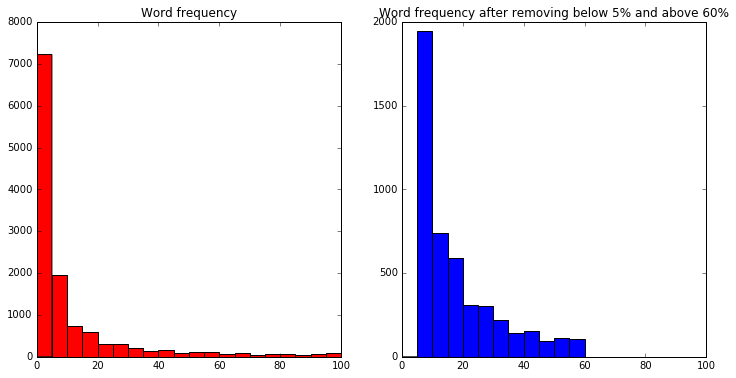

In [157]:
#Only use terms that appear in more than 5% and less than 60% of the speeches
#Get frequency of words in documents
import pandas as pd
from collections import Counter
freq = Counter()
for doc in df_corpus['Clean']:
    for w in set(doc):
        freq.update({w: 1})

#Dataframe with word frequency in the documents (eg in how many docs a word is present at least once)
df = pd.DataFrame({'Word': freq.keys(), 'Freq': freq.values()})
docs_num = len(df_corpus['Clean'])
#Plot in histogram
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(df.Freq/docs_num*100, bins=20, range=(0,100), color='red')
plt.title("Word frequency")
#Get words to remove
wrdskip = set(df["Word"][(df.Freq>=docs_num*0.6) | (df.Freq<=docs_num*0.05)])
wrdskip.update(['applause','laughter'])
#Also plot what is left
df2 = df[(df.Freq<docs_num*0.6) & (df.Freq>docs_num*0.05)]
plt.subplot(122)
plt.hist(df2.Freq/docs_num*100, bins=20, range=(0,100), color='blue')
plt.title("Word frequency after removing below 5% and above 60%");
#Create df_corpus['Filtered'] with the filtered text
df_corpus['Filtered'] = [filter(lambda el: el not in wrdskip, doc) for doc in df_corpus['Clean']]
df_corpus.head()

![alt text](https://cdn-images-1.medium.com/max/1600/1*MLJVWz4EdOFsqhvBxEi9iA.png "Topic Analysis")


In [160]:
doc_term_matrix

[[(0, 1),
  (1, 6),
  (2, 3),
  (3, 2),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 2),
  (8, 1),
  (9, 11),
  (10, 3),
  (11, 3),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 19),
  (23, 2),
  (24, 1),
  (25, 2),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 3),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 3),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 3),
  (45, 1),
  (46, 3),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 4),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 3),
  (74, 19),
  (75, 6),
  (76, 5),
  (77, 2),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 9),
  (84, 3),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 5),
  (89, 3),
  (90, 1),
  (91,

In [158]:
# Preparing Document-Term Matrix containing (term ID, term frequency) pairs
import gensim
from gensim import corpora
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(df_corpus['Filtered'])
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_corpus['Filtered']]
#df_corpus['Filtered'][0:]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=50)

In [159]:
#Show the topics
topics = ldamodel.print_topics(num_topics=4, num_words=10)
for t in topics: print(t)

(0, u'0.011*"terrorist" + 0.011*"iraq" + 0.007*"iraqi" + 0.006*"terror" + 0.006*"enemy" + 0.004*"al" + 0.004*"qaida" + 0.004*"regime" + 0.004*"drug" + 0.004*"afghanistan"')
(1, u'0.006*"fiscal" + 0.005*"agency" + 0.005*"employment" + 0.004*"proposed" + 0.004*"management" + 0.004*"oil" + 0.003*"rural" + 0.003*"domestic" + 0.003*"commission" + 0.003*"expenditure"')
(2, u'0.010*"shall" + 0.006*"communist" + 0.005*"farm" + 0.004*"labor" + 0.004*"expenditure" + 0.003*"recommend" + 0.003*"aggression" + 0.003*"whole" + 0.003*"enterprise" + 0.003*"vietnam"')
(3, u'0.005*"college" + 0.004*"parent" + 0.004*"thank" + 0.003*"dream" + 0.003*"drug" + 0.003*"idea" + 0.003*"company" + 0.003*"something" + 0.003*"tell" + 0.003*"teacher"')


In [155]:
ldamodel.get_term_topics('atom') #Returns most likely topics for a particular word in vocab
#ldamodel.get_document_topics
ldamodel.get_topic_terms(0)
#dictionary
help(pstemmer.pool)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __cmp__(...)
 |      x.__cmp__(y) <==> cmp(x,y)
 |  
 |  __contains__(...)
 |      D.__contains__(k) -> True if D has a key k, else False
 |  
 |  __delitem__(...)
 |      x.__delitem__(y) <==> del x[y]
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x>y
 |  
 |  __init__(

In [11]:
#The LDA model allows 1- to 3-word phrases to be considered as terms
#https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words